# CRCDocker Tutorial

### Mort Canty, December 2015

This tutorial describes the Docker container <b>mort/crcdocker</b> which encapsulates many of the Python scripts accompanying my <a href="http://www.amazon.com/Analysis-Classification-Change-Detection-Sensing/dp/1466570377/ref=dp_ob_title_bk"> textbook</a>. The container eliminates completely the need to install Python dependencies on the client computer. It serves the scripts in an IPython notebook in the user's browser.

## Running the container

First of all, <a href="https://docs.docker.com/">install Docker</a>.

To pull the image from Docker Hub and start the container, run

<b>sudo docker run -d -p 433:8888 -v yourImageFolder:/home/imagery --name=crc mort/crcdocker</b>

Here, <b>yourImageFolder</b> is the location of your images on the Linux host. You can stop and re-start the container with

<b>sudo docker stop crc</b>

<b>sudo docker start crc</b>

Point your browser to

<b>http://localhost:433</b>

to see the IPython Notebook main page. Then open (somewhat self-referentially) this tutorial notebook  and list the contents of the home directory with

In [1]:
cd /home

/home


In [2]:
ls -l 

total 152
-rw-rw-r-- 1 root root  7945 Oct 18 14:25 atwt.py
-rw-rw-r-- 1 root root  1275 Oct 18 14:25 c-correction.sh
-rw-rw-r-- 1 root root  8823 Oct 18 14:25 c_corr.py
-rw-rw-r-- 1 root root 11570 Oct 18 14:25 classify.py
-rw-rw-r-- 1 root root 11945 Oct 18 14:25 classify_cv.py
-rw-rw-r-- 1 root root  3607 Oct 18 14:25 ct.py
-rw-rw-r-- 1 root root 10931 Dec  4 09:42 dispms.py
-rw-rw-r-- 1 root root  8207 Oct 18 14:25 dwt.py
-rw-rw-r-- 1 root root 12230 Oct 18 14:25 em.py
-rw-rw-r-- 1 root root  8893 Oct 18 14:25 iMad.py
drwxr-xr-x 6 root root  4096 Dec 10 19:08 imagery/
-rwxr-xr-x 1 root root  8072 Dec 10 11:30 libprov_means.so*
-rw-rw-r-- 1 root root  3113 Oct 18 14:25 mcnemar.py
-rw-rw-r-- 1 root root  1928 Oct 18 14:25 normalize
-rw-rw-r-- 1 root root  4150 Oct 18 14:25 pca.py
-rw-rw-r-- 1 root root   728 Oct 18 14:25 prov_means.c
-rw-rw-r-- 1 root root  7499 Oct 18 14:25 radcal.py
-rw-rw-r-- 1 root root  4996 Oct 18 14:25 register.py
drwxr-xr-x 3 root root  4096 Dec 10 19:39 tuto

In addtion to the Python scripts, there are two directories <b>imagery</b> and <b>tutorial</b>. The former mirrors the host image directory and the latter contains this tutorial and a few sample images:

In [3]:
ls tutorial -l

total 4752
-rw-rw-r-- 1 root root  483623 Oct 18 14:25 aster_1.tif
-rw-rw-r-- 1 root root  483623 Oct 18 14:25 aster_2.tif
-rw-rw-r-- 1 root root    3713 Oct 18 14:25 ct.py
-rw-rw-r-- 1 root root 1504385 Oct 18 14:25 landsat.tif
-rw-rw-r-- 1 root root 2378478 Dec 10 19:39 tutorial.ipynb


## Running scripts and getting help

The Ipython "magic" command <b>%run</b>, or also simply <b>run</b>, is used to run the Python programs, all of which are command-line scripts controlled with various option flags. For example, to get help with the principal components analysis script:

In [4]:
run /home/pca -h

Usage: python /home/pca.py  [-d dims] [-p pos] fileName

            spatial dimension is a list, e.g., -d [0,0,400,400] 



Note that you can leave out the <b>.py</b> extension when running a script in this way.

We will do a PCA on a $400\times 400$ spatial subset of the <b>landsat.tif</b> image. First we can use the GDAL utility <b>gdalinfo</b> to get information about the image. We use the "bang" <b>!</b> to tell Ipython that this is an OS command:

In [5]:
!gdalinfo /home/tutorial/landsat.tif

Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Driver: GTiff/GeoTIFF
Files: /home/tutorial/landsat.tif
Size is 500, 500
Coordinate System is:
PROJCS["WGS 84 / UTM zone 31N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","32631"]]
Origin = (730754.250000000000000,5651621.250000000000000)
Pixel Size = (28.500000000000000,-28.500000000000000)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_XRESOLUTION=1


Then enable graphics and run the PCA script:

------------PCA ---------------
Thu Dec 10 19:42:25 2015
Input tutorial/landsat.tif
Eigenvalues: [ 2399.68039683   331.15418292   107.28531212    18.20573844    12.74263422
     2.46395646]


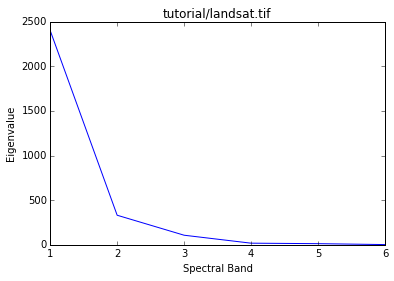

result written to: tutorial/landsat_pca.tif
elapsed time: 0.306126117706


In [8]:
%matplotlib inline
%run /home/pca -d [0,0,400,400] tutorial/landsat.tif

If you wish to suppress graphical output, include the <b>-n</b> flag:

In [9]:
run /home/pca -d [0,0,400,400] -n tutorial/landsat.tif

------------PCA ---------------
Thu Dec 10 19:42:57 2015
Input tutorial/landsat.tif
Eigenvalues: [ 2399.68039683   331.15418292   107.28531212    18.20573844    12.74263422
     2.46395646]
result written to: tutorial/landsat_pca.tif
elapsed time: 0.101505041122


## Displaying images

The script <b>dispms.py</b> will generate RGB composite images of any three bands of a multispectral image. Up to two images can be placed side-by-side. Lower case options refer to the left hand image, upper case to the right hand image, if present:

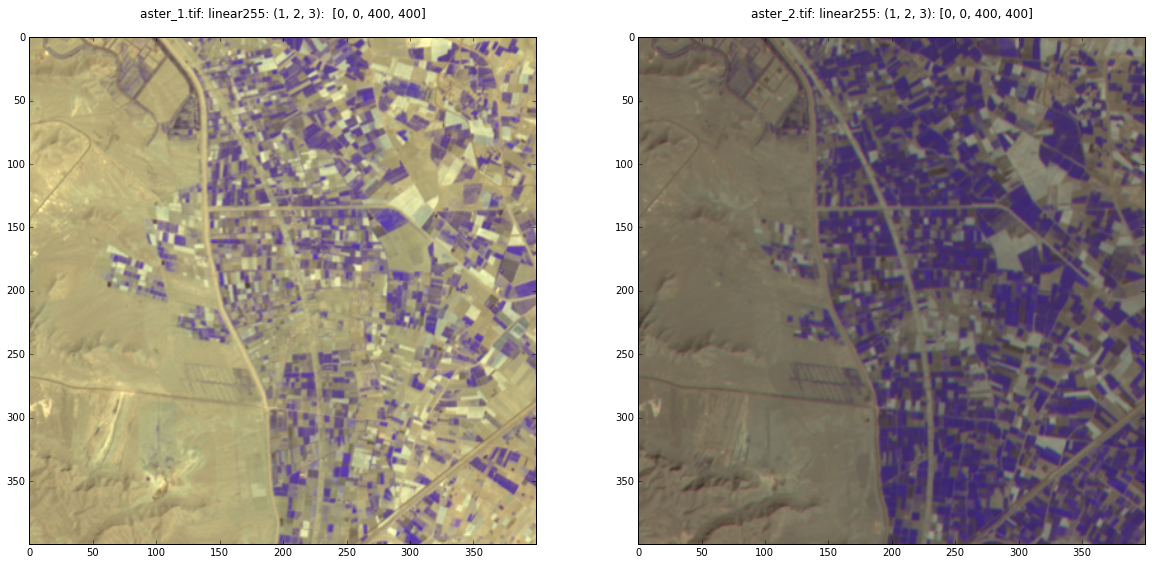

In [10]:
run /home/dispms -f /home/tutorial/aster_1.tif -F tutorial/aster_2.tif -p [1,2,3] -e 1 -E 1

The images have been dispayed above in a 0-255 linear stretch ( flags <b>-e 1</b> and <b>-E 1</b> in order to highlight the radiometric differences between them.

## IR-MAD and radiometric normalization

We will now use th IR-MAD algorithm to locate invariant pixels for a relative radiometric normalization of the two aster images. First the IR-MAD transformation:

------------IRMAD -------------
Thu Dec 10 19:47:41 2015
time1: /home/tutorial/aster_1.tif
time2: /home/tutorial/aster_2.tif
rho: [ 0.91873628  0.97905332  0.99424297]
result written to: /home/tutorial/MAD(aster_1-aster_2.tif).tif
elapsed time: 11.3282461166


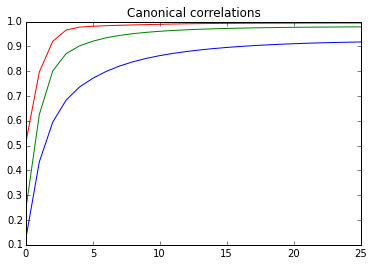

In [15]:
run /home/iMad /home/tutorial/aster_1.tif /home/tutorial/aster_2.tif

And next the normalization script:

Thu Dec 10 19:45:53 2015
reference: /home/tutorial/aster_1.tif
target   : /home/tutorial/aster_2.tif
no-change probability threshold: 0.95
no-change pixels: 110
band: 1  slope: 1.383160  intercept: 19.047685  correlation: 0.994329
band: 2  slope: 1.426778  intercept: 15.487514  correlation: 0.997695
band: 3  slope: 1.152285  intercept: 19.297823  correlation: 0.996099


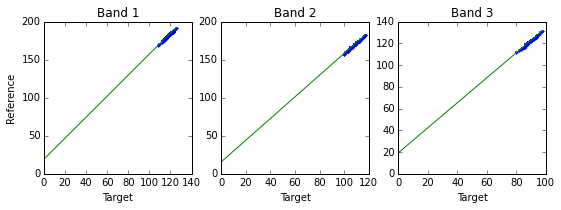

result written to: /home/tutorial/aster_2_norm.tif
elapsed time: 0.409995079041


In [13]:
run /home/radcal /home/tutorial/MAD(aster_1-aster_2.tif).tif

Comparing the images as before, we now see that the images are radiometrically similar:

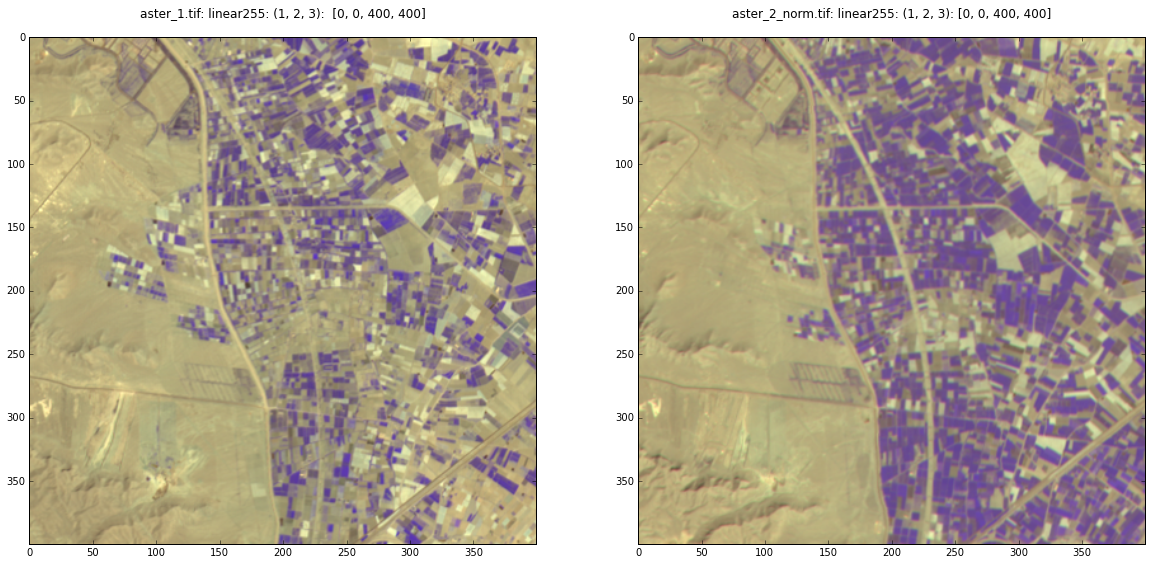

In [14]:
run /home/dispms -f /home/tutorial/aster_1.tif -F /home/tutorial/aster_2_norm.tif -p [1,2,3] -e 1 -E 1

Now feel free to continue experimenting on your own: